# Importing Libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model #build linear regressioon model
from sklearn.metrics import mean_squared_error, r2_score #compute performance

# Load Dataset

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,garagepl
0,42000.0,5850,3,1,2,yes,1
1,38500.0,4000,2,1,1,yes,0
2,49500.0,3060,3,1,1,yes,0
3,60500.0,6650,3,1,2,yes,0
4,61000.0,6360,2,1,1,yes,0
...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,yes,0
542,94000.0,6000,3,2,4,yes,0
543,103000.0,6000,3,2,4,yes,1
544,105000.0,6000,3,2,2,yes,1


# PreProcessing

## Handling missing data

In [6]:
num_cols = ['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']
imp_mean = SimpleImputer(strategy='median') #you can use median, mean, constant i.e [strategy='constant', fill_value = 2]
# if you want to add an indicator to know where the change was made add [add_indicator=True] as an argument

# Create ColumnTransformer to apply imputation only for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', imp_mean, num_cols)
    ])

# Fit and transform the data
transformed_data = preprocessor.fit_transform(df)

transformed_data

array([[4.20e+04, 5.85e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00],
       [3.85e+04, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [4.95e+04, 3.06e+03, 3.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       ...,
       [1.03e+05, 6.00e+03, 3.00e+00, 2.00e+00, 4.00e+00, 1.00e+00],
       [1.05e+05, 6.00e+03, 3.00e+00, 2.00e+00, 2.00e+00, 1.00e+00],
       [1.05e+05, 6.00e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00]])

In [7]:
# Reassemble transformed_data into a DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=num_cols)

# Update the original DataFrame with transformed values
df[num_cols] = transformed_df

df

,price,lotsize,bedrooms,bathrms,stories,driveway,garagepl
0,42000.0,5850.0,3.0,1.0,2.0,yes,1.0
1,38500.0,4000.0,2.0,1.0,1.0,yes,0.0
2,49500.0,3060.0,3.0,1.0,1.0,yes,0.0
3,60500.0,6650.0,3.0,1.0,2.0,yes,0.0
4,61000.0,6360.0,2.0,1.0,1.0,yes,0.0
...,...,...,...,...,...,...,...
541,91500.0,4800.0,3.0,2.0,4.0,yes,0.0
542,94000.0,6000.0,3.0,2.0,4.0,yes,0.0
543,103000.0,6000.0,3.0,2.0,4.0,yes,1.0
544,105000.0,6000.0,3.0,2.0,2.0,yes,1.0


## creating unique nummerical data for labels

In [8]:
df['driveway'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
df['driveway'].value_counts()

driveway
yes    469
no      77
Name: count, dtype: int64

In [10]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [11]:
df['driveway'] = label_encoder.fit_transform(df['driveway'])

In [12]:
df

,price,lotsize,bedrooms,bathrms,stories,driveway,garagepl
0,42000.0,5850.0,3.0,1.0,2.0,1,1.0
1,38500.0,4000.0,2.0,1.0,1.0,1,0.0
2,49500.0,3060.0,3.0,1.0,1.0,1,0.0
3,60500.0,6650.0,3.0,1.0,2.0,1,0.0
4,61000.0,6360.0,2.0,1.0,1.0,1,0.0
...,...,...,...,...,...,...,...
541,91500.0,4800.0,3.0,2.0,4.0,1,0.0
542,94000.0,6000.0,3.0,2.0,4.0,1,0.0
543,103000.0,6000.0,3.0,2.0,4.0,1,1.0
544,105000.0,6000.0,3.0,2.0,2.0,1,1.0


In [13]:
df['driveway'].unique()

array([1, 0])

## Split Data

In [14]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'garagepl'],
      dtype='object')

In [27]:
y = df['price']
X = df[['lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway', 'garagepl']]

In [20]:
y.shape

(546,)

In [28]:
X.shape

(546, 6)

In [29]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Scalling (Standardization/normalization)

In [30]:
scaler = StandardScaler().fit(X_train)

In [31]:
scaler.mean_
#mean for every column under the dataset

array([5.14356651e+03, 2.95183486e+00, 1.29357798e+00, 1.77293578e+00,
       8.55504587e-01, 6.76605505e-01])

In [32]:
# get the varience
scaler.scale_

array([2.15790699e+03, 7.29440737e-01, 5.16742661e-01, 8.49339520e-01,
       3.51591366e-01, 8.66556742e-01])

In [33]:
#transform
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[-0.48360125, -1.30488306,  1.36706735, -0.91004335,  0.41097543,
        -0.78079769],
       [-0.64811251,  0.06603023, -0.56813188,  0.26734211,  0.41097543,
        -0.78079769],
       [ 0.70273348,  1.43694352,  1.36706735,  0.26734211,  0.41097543,
         0.37319483],
       ...,
       [-1.53276603, -1.30488306, -0.56813188, -0.91004335, -2.43323548,
        -0.78079769],
       [-0.36682142,  1.43694352, -0.56813188,  0.26734211, -2.43323548,
         0.37319483],
       [ 0.01224959,  0.06603023, -0.56813188,  2.62211303,  0.41097543,
        -0.78079769]])

In [34]:
X_train_scaled.mean(axis=0)
#its mean should be 0 if its standardized

array([ 3.66679164e-17, -2.03710647e-16, -5.39833214e-17, -3.76864696e-17,
       -1.30374814e-16,  2.95380438e-17])

In [35]:
X_train_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1.])

### Test

In [36]:
scaler1 = StandardScaler().fit(X_test)

In [37]:
scaler1.mean_
#mean for every column under the dataset

array([5.17681818e+03, 3.01818182e+00, 1.25454545e+00, 1.94545455e+00,
       8.72727273e-01, 7.54545455e-01])

In [38]:
# get the varience
scaler1.scale_

array([2.19842668e+03, 7.62553345e-01, 4.35605402e-01, 9.22805639e-01,
       3.33278232e-01, 8.33245174e-01])

In [39]:
#transform
X_test_scaled = scaler1.transform(X_test)
X_test_scaled

array([[-0.37609541, -1.335227  , -0.58434871, -1.02454353,  0.38188131,
        -0.90555034],
       [ 0.40173358, -0.02384334, -0.58434871, -1.02454353,  0.38188131,
        -0.90555034],
       [-0.78547909, -0.02384334, -0.58434871,  0.05910828,  0.38188131,
         0.29457662],
       [ 1.27508543, -0.02384334, -0.58434871, -1.02454353,  0.38188131,
         0.29457662],
       [-0.13501391, -0.02384334, -0.58434871, -1.02454353,  0.38188131,
         1.49470358],
       [ 0.48997851,  1.28754033,  1.71130694, -1.02454353,  0.38188131,
         0.29457662],
       [-0.71724847, -1.335227  , -0.58434871, -1.02454353,  0.38188131,
        -0.90555034],
       [-0.94923256, -0.02384334, -0.58434871,  0.05910828, -2.61861468,
        -0.90555034],
       [ 0.10151888,  1.28754033, -0.58434871,  0.05910828,  0.38188131,
        -0.90555034],
       [ 0.64736379, -0.02384334,  1.71130694,  1.14276009,  0.38188131,
        -0.90555034],
       [-1.04930413, -1.335227  , -0.58434871,  0.

In [40]:
X_test_scaled.mean(axis=0)
#its mean should be 0 if its standardized

array([-9.08364293e-17,  1.21115239e-16, -1.79654271e-16, -9.28550166e-17,
        1.54421930e-16,  1.06985128e-16])

In [41]:
X_test_scaled.std(axis=0)
#std should be 1

array([1., 1., 1., 1., 1., 1.])

# Simple Linear Regression

## Build Linear Regression

In [43]:
model = linear_model.LinearRegression()

## Build Training Model

In [46]:
model.fit(X_train, y_train)

LinearRegression()

## Make prediction with trained model

In [47]:
y_pred = model.predict(X_test)

## Prediction Results

### Print Model Performance

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Coefficients, {model.coef_}')
print(f'Intercept, {model.intercept_}')
print(f'Mean Squared Error {mse:.2f}')
print(f'Coefficient of determination {r2:.2f}')

Coefficients, [4.02393743e+00 3.43166434e+03 1.58137047e+04 7.53423338e+03
 9.90935902e+03 5.33701222e+03]
Intercept, -9131.131513727261
Mean Squared Error 362443752.35
Coefficient of determination 0.50


In [52]:
df.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'garagepl'],
      dtype='object')

In [54]:
# Fomula of  sstraight line is Y = mx + c
# The equation o this linear regression model(model) is [y = 4.02393743e+00(lotsize) + 3.43166434e+03(bedrooms) + 1.58137047e+04(bathrms) + 7.53423338e+03(stories) + 9.90935902e+03(driveway) + 5.33701222e+03(garagepl) -9131.131513727261]

# the Coefficients are accociated to the features from the X varible so you just muliply the Coefficients by their associate feater and add everything toger plus the intercep

# Plot

In [68]:
y_pred.shape

(110,)

In [69]:
y_test_arr = np.array(y_test)
y_test_arr.shape

(110,)

AttributeError: PathCollection.set() got an unexpected keyword argument 'kde'

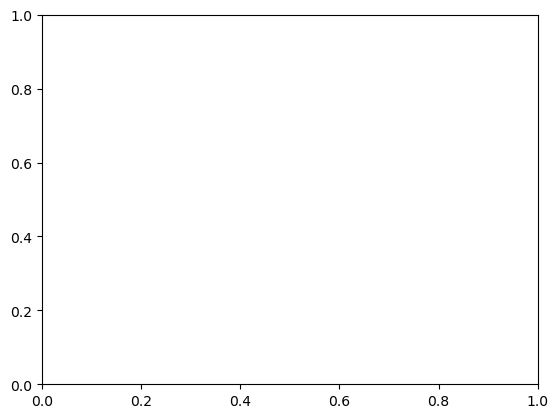

In [70]:
sns.scatterplot(x = y_test_arr, y = y_pred, marker="+", kde=True)